## AIRBNB INSIGHTS 

We are going to discuss about some statistics of the Airbnb for the last 12 months.


## Important  libraries     
Please install in your local machine the below libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display,HTML
import altair as alt
from vega_datasets import data
import ipywidgets as widgets

## Reading the Data

Now we are going to read the csv files for all the cities that we are interested, and we are going to make a dictionary with the cities as key values

In [3]:
cities = ["Amsterdam", "Athens", "Barcelona", "Berlin", "Copenhagen", 
          "Dublin", "Lisbon", "London", "Madrid", "Paris", "Rome", 
          "Venice", "Vienna"]
residents = [790044, 637798, 1660122, 3755251, 1336982, 592713, 
             545923, 8799728, 3332035, 2145906, 2874605, 259970, 1973403]

city_data = {}

for i, city in enumerate(cities):
    filename = f"listings/{city}.csv"  # Construct the file path
    try:
        # Read the CSV file into a DataFrame and store it in the city_data dictionary
        city_data[city] = pd.read_csv(filename)
    except FileNotFoundError:
        # Handle the case where the file is not found
        print(f"File not found for {city}")

## AirBnB Listings

In this section we are going to count how many listings are in each city.

,City,Listings
0,Amsterdam,9659
1,Athens,13274
2,Barcelona,19482
3,Berlin,13759
4,Copenhagen,20909
5,Dublin,6175
6,Lisbon,24204
7,London,96182
8,Madrid,26980
9,Paris,95461


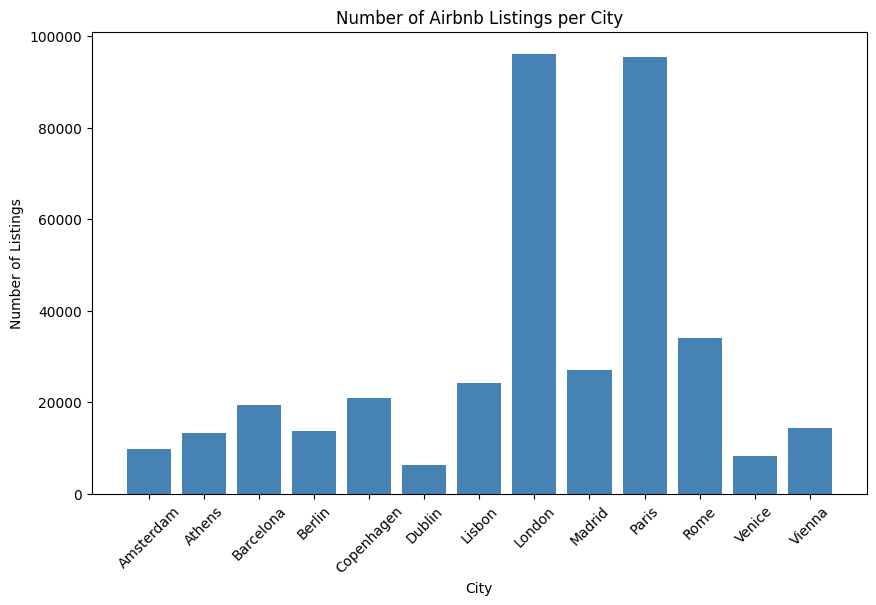

In [10]:
listings_count = []
for i, city in enumerate(cities):
    if city in city_data: 
        total_listings = city_data[city].shape[0] 
        listings_count.append({"City": city, "Listings": total_listings})

listings_df = pd.DataFrame(listings_count)

display(listings_df)

plt.figure(figsize=(10, 6))  # Set figure size

plt.bar(listings_df['City'], listings_df['Listings'], color='steelblue')

plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.title('Number of Airbnb Listings per City')
plt.xticks(rotation=45)  

plt.show()

## AirBnB Densities
We are going to calculate the airbnb density per 1000 inhabitants. There is already a list that contains the residents per city and this information is from wikipedia.

,City,Listings Density
0,Amsterdam,12.0
1,Athens,21.0
2,Barcelona,12.0
3,Berlin,4.0
4,Copenhagen,16.0
5,Dublin,10.0
6,Lisbon,44.0
7,London,11.0
8,Madrid,8.0
9,Paris,44.0


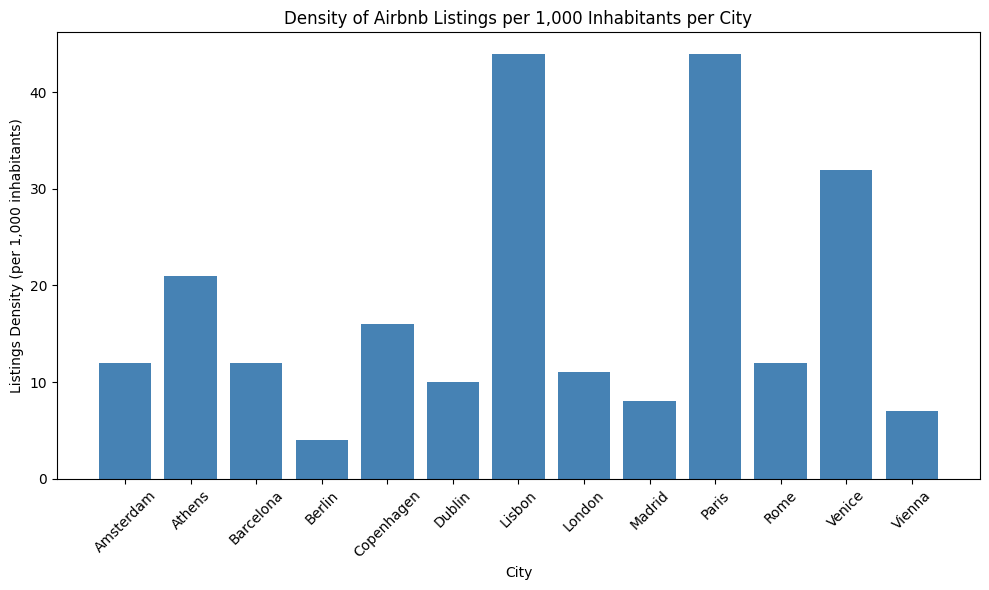

In [4]:
density_count = []
for i, city in enumerate(cities):
    if city in city_data:  # Check if data is available for the city
        total_listings = city_data[city].shape[0]  # Count the number of listings
        # Calculate the density: (number of listings / number of residents) * 1000
        density = round((total_listings / residents[i]) * 1000, 0)
        density_count.append({"City": city, "Listings Density": density})

# Convert the density_count list into a DataFrame
density_df = pd.DataFrame(density_count)

# Display the DataFrame
display(density_df)

# Plotting the density of listings per 1,000 inhabitants for each city
plt.figure(figsize=(10, 6))  # Set figure size

# Create a bar plot for density
plt.bar(density_df['City'], density_df['Listings Density'], color='steelblue')

# Add labels and title to the plot
plt.xlabel('City')
plt.ylabel('Listings Density (per 1,000 inhabitants)')
plt.title('Density of Airbnb Listings per 1,000 Inhabitants per City')
plt.xticks(rotation=45)  # Rotate city names for better readability

# Adjust layout to prevent clipping and show the plot
plt.tight_layout()
plt.show()

## Activity
We are going to calculate

,City,Average Nights
0,Amsterdam,56.0
1,Athens,86.0
2,Barcelona,71.0
3,Berlin,54.0
4,Copenhagen,31.0
5,Dublin,85.0
6,Lisbon,88.0
7,London,35.0
8,Madrid,85.0
9,Paris,34.0


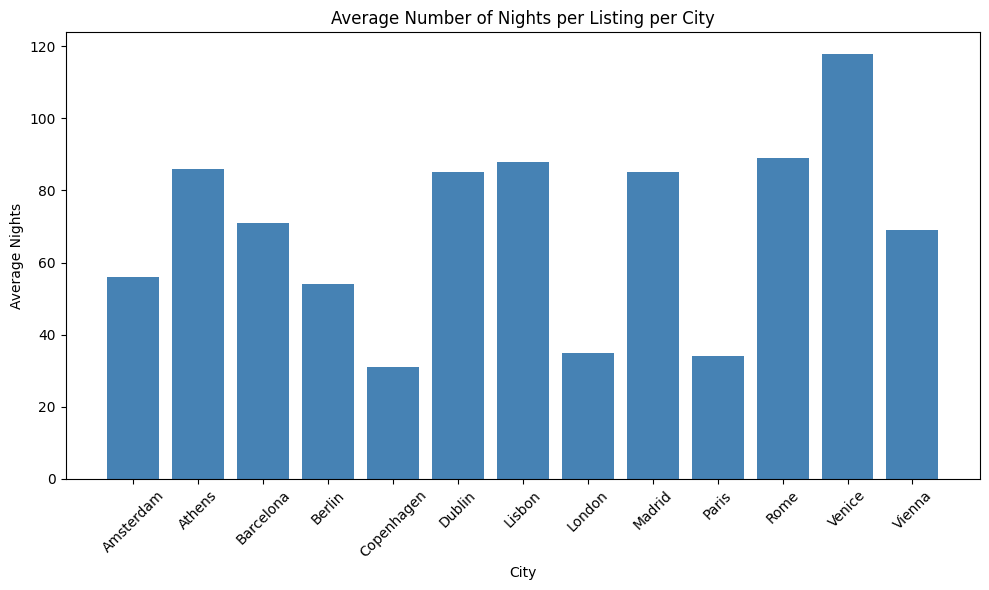

,City,Average Income
0,Amsterdam,10030.0
1,Athens,8660.0
2,Barcelona,13429.0
3,Berlin,7564.0
4,Copenhagen,32740.0
5,Dublin,13082.0
6,Lisbon,11600.0
7,London,4611.0
8,Madrid,9872.0
9,Paris,5572.0


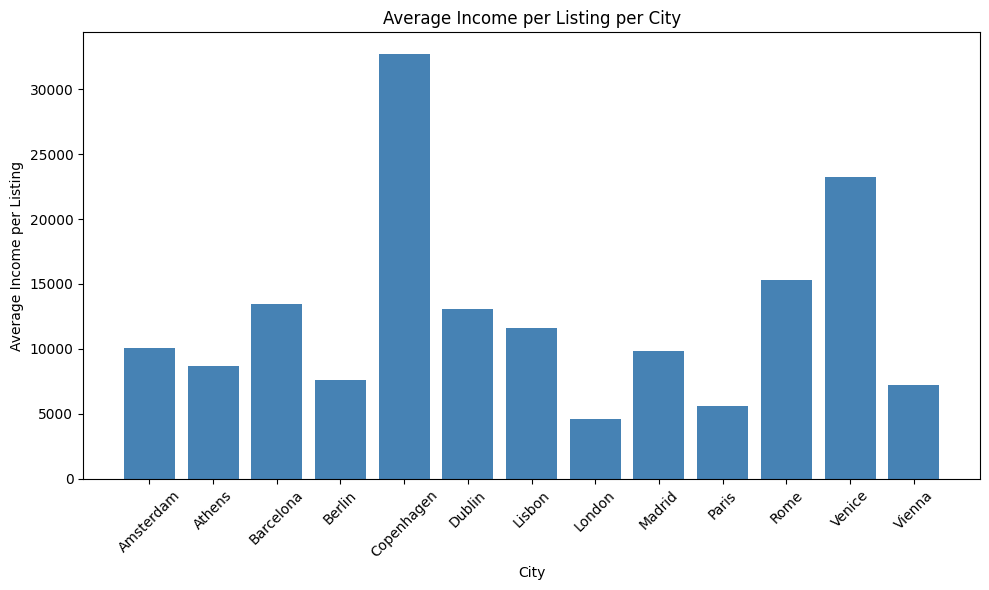

In [5]:
average_bookings_per_city = []
average_income_per_city = []

for city in cities:
    if city in city_data:  
        total_listings = city_data[city].shape[0] 
        reviews_column = city_data[city]['number_of_reviews_ltm']
        price_column = city_data[city]['price']

        total_bookings = 0
        total_income = 0

        for reviews, price in zip(reviews_column, price_column):
            total_bookings += reviews * 2 * 3
            if price >= 0:
                total_income += reviews * 2 * 3 * price

        average_bookings = round(total_bookings / total_listings, 0)  # Rounded to 0 decimal places
        average_income = round(total_income / total_listings, 0)  # Rounded to 0 decimal places


        average_bookings_per_city.append({"City": city, "Average Nights": average_bookings})
        average_income_per_city.append({"City": city, "Average Income": average_income})


average_bookings_per_city_df = pd.DataFrame(average_bookings_per_city)
average_income_per_city_df = pd.DataFrame(average_income_per_city)


display(average_bookings_per_city_df)


plt.figure(figsize=(10, 6))
plt.bar(average_bookings_per_city_df['City'], average_bookings_per_city_df['Average Nights'], color='steelblue')
plt.xlabel('City')
plt.ylabel('Average Nights')
plt.title('Average Number of Nights per Listing per City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

display(average_income_per_city_df)

plt.figure(figsize=(10, 6))
plt.bar(average_income_per_city_df['City'], average_income_per_city_df['Average Income'], color='steelblue')
plt.xlabel('City')
plt.ylabel('Average Income per Listing')
plt.title('Average Income per Listing per City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Cross-check

## Visualisation
In this section, there are some visualisations based on the visualisations of insideairbnb. At first there is an interactive dropdown menu which is made using the widgets library. Whenever the user selects a city, we call 5 functions with the selected city as a parameter. Each fuction creates and displays a different chart based on the theme. For the charts, the altair library was used. Additionaly, the HTML library is used for the format of visualisations.

In [6]:
city_dropdown = widgets.Dropdown(
    options=["Select a city"] + cities,
    description='City:',
    disabled=False,
    value="Select a city"  
)

def on_city_change(change):
    selected_city = change
    if selected_city != "Select a city":     
        show_room_type_chart(selected_city)
        show_activity_chart(selected_city)
        show_license_chart(selected_city)
        show_short_term_rentals_chart(selected_city)
        show_listing_per_host_chart(selected_city)
        get_top_hosts(selected_city)
        
interactive_output = widgets.interactive(on_city_change, change=city_dropdown)

display(interactive_output)

def show_room_type_chart(city_name):
    
    room_type_count =city_data[city_name].groupby('room_type').size().reset_index(name='count')
    total_listings=city_data[city_name].shape[0]
    room_type_count['percentage'] = (room_type_count['count'] / total_listings) * 100
   
    room_type_count['percentage'] = room_type_count['percentage'].round(1)
    room_type_count['percentage'] = room_type_count['percentage'].astype(str) + '%'
    
    room_type_count['count'] = pd.to_numeric(room_type_count['count'], errors='coerce')
    
    room_type_count.dropna(subset=['count'], inplace=True)
    
    room_type_count = room_type_count.sort_values(by='count', ascending=False)
    
    bar_chart = alt.Chart(room_type_count).mark_bar(
        color='steelblue',
        size=30  
    ).encode(
        y=alt.Y('room_type:N', sort='-x', title='Room Type', axis=alt.Axis(grid=False)),
        x=alt.X('count:Q', title='Listings', axis=alt.Axis(grid=False)),
        color=alt.Color('room_type:N', legend=alt.Legend(title="Room Type")),
        tooltip=[
            alt.Tooltip('room_type:N', title='Room Type'),
            alt.Tooltip('count:Q', title='Total Listings')
        ]
    ).properties(
        width=700,
        height=300,
    )

    title = "<h1 style='color: navy; font-weight: bold;'>Room Type </h1>"
    display(HTML(title))
    grey_line = "<hr style='border: 0.5px solid #D3D3D3;'>"
    display(HTML(grey_line))
    
    content = """
    <div style="display: flex; justify-content: space-between; align-items: flex-start;">
        <!-- Left side paragraph -->
        <div style="width: 45%; font-size: 16px; color: #333333;"> <!-- Reduced width of the left container -->
            <p>
                Some Airbnb hosts have multiple listings. <br>
                A host may list separate rooms in the same apartment, or multiple apartments or homes available in their entirety.<br>
                Hosts with multiple listings are more likely to be running a business, are unlikely to be living in the property, and in violation of most short term rental laws designed to protect residential housing.
            </p>
        </div>
        
        <!-- Right side room type metrics -->
        <div style="width: 30%; font-size: 18px; color: #333333; margin-left: 10%;"> <!-- Added margin-left to push content to the right -->
    """
    
    for index, row in room_type_count.iterrows():
        content += f"""
            <p style="margin: 5px 0;"><strong>{row['count']} ({row['percentage']})</strong><br>
            {row['room_type']}</p> <!-- Removed bullet points and added margin for spacing -->
        """

    content += """
        </div>
    </div>
    """

    display(HTML(content))

    bar_chart.show()

def show_activity_chart(city_name):

    if city_name not in city_data:
        print(f"No data available for {city_name}.")
        return
    if 'number_of_reviews_ltm' not in city_data[city_name].columns:
        print(f"'number_of_reviews_ltm' column not found in {city_name} data.")
        return

    city_data[city_name]['occupancy'] = city_data[city_name]['number_of_reviews_ltm'] * 6
    
    bin_edges = [-0.1, 1, 30, 60, 90, 120, 150, 180, 210, 240, float('inf')]  
    bin_labels = ['0', '1-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240', '241+']

    avg_nights_booked = round(city_data[city_name]['occupancy'].mean(), 0)  
    avg_price = round(city_data[city_name]['price'].mean(), 0) 
    avg_income = round(avg_nights_booked * avg_price, 0) if avg_price else 0  

    city_data[city_name]['occupancy_bin'] = pd.cut(
        city_data[city_name]['occupancy'],
        bins=bin_edges,
        labels=bin_labels,
        right=False  # Include the left edge, exclude the right edge
    )
    
    occupancy_count = city_data[city_name].groupby('occupancy_bin', observed=False).size().reset_index(name='count')
    
    bar_chart = alt.Chart(occupancy_count).mark_bar(color='steelblue').encode(
        x=alt.X(
            'occupancy_bin:O',
            title='Occupancy(Last 12 months)',
            sort=bin_labels,  
            axis=alt.Axis(labelAngle=0, grid=False)  
        ),
        y=alt.Y('count:Q', title='Number of Listings', axis=alt.Axis(grid=False)),
        tooltip=[
            alt.Tooltip('occupancy_bin:O', title='Occupancy Range'),
            alt.Tooltip('count:Q', title='Listings')
        ]
    ).properties(
        width=700,
        height=300,
    )

    title = "<h1 style='color: navy; font-weight: bold;'>Activity</h1>"
    display(HTML(title))
    grey_line = "<hr style='border: 0.5px solid #D3D3D3;'>"
    display(HTML(grey_line))

    content = """
    <div style="display: flex; justify-content: space-between; align-items: flex-start;">
        <!-- Left side paragraph -->
        <div style="width: 48%; font-size: 18px; color: #333333;">
            <p>
                he minimum stay, price and number of reviews have been used to estimate the the number of nights booked and the income for each listing, for the last 12 months.
<br>
Is the home, apartment or room rented frequently and displacing units of housing and residents? Does the income from Airbnb incentivise short-term rentals vs long-term housing?
            </p>
        </div>
        
        <!-- Right side metrics -->
        <div style="width: 48%; font-size: 18px; color: #333333;">
                <div style="text-align: center;">
                    <strong>{:.0f}</strong><br>Average Nights Booked
                </div>
                <div style="text-align: center; margin-top: 10px;">
                    <strong>€{:.0f}</strong><br>Average Price
                </div>
                <div style="text-align: center; margin-top: 10px;">
                    <strong>€{:.0f}</strong><br>Average Income
                </div>
            </div>
        </div>
        """.format(
            avg_nights_booked,  # Average Nights Booked
            avg_price,          # Average Price
            avg_income          # Average Income
        
            )
    display(HTML(content))
    
    display(bar_chart)

def categorize_license_status(license_value):
    if pd.isna(license_value) or license_value.lower() == 'unlicensed':
        return 'Unlicensed'
    elif license_value.lower() in ['exempt', 'pending']:
        return license_value.capitalize()
    else:
        return 'Licensed'

def show_license_chart(city_name):
    if city_name not in city_data:
        print(f"No data available for {city_name}.")
        return
    if 'license' not in city_data[city_name].columns:
        print(f"'license' column not found in {city_name} data.")
        return
        
    city_data[city_name]['license_status'] = city_data[city_name]['license'].apply(categorize_license_status)

    license_status_count = city_data[city_name]['license_status'].value_counts().reset_index()
    license_status_count.columns = ['license_status', 'count']
    
    all_categories = ['Licensed', 'Unlicensed', 'Exempt', 'Pending']
    complete_data = pd.DataFrame(all_categories, columns=['license_status'])
    complete_data = complete_data.merge(license_status_count, on='license_status', how='left').fillna(0)

    complete_data['count'] = complete_data['count'].astype(int)

    total_listings = complete_data['count'].sum()
    complete_data['percentage'] = (complete_data['count'] / total_listings * 100).round(1).astype(str) + '%'

    donut_chart = alt.Chart(complete_data).mark_arc(innerRadius=90).encode(
        theta=alt.Theta('count:Q', title='Number of Listings'),
        color=alt.Color('license_status:N', legend=alt.Legend(title='License Status')),
        tooltip=[
            alt.Tooltip('license_status:N', title='License Status'),
            alt.Tooltip('count:Q', title='Total Listings')
        ]
    )
    
    title = "<h1 style='color: navy; font-weight: bold;'>Licenses </h1>"
    display(HTML(title))
    grey_line = "<hr style='border: 0.5px solid #D3D3D3;'>"
    display(HTML(grey_line))

    content = """
    <div style="display: flex; justify-content: space-between; align-items: flex-start;">
        <!-- Left side (Paragraph and Chart) -->
        <div style="width: 65%; font-size: 18px; color: #333333;">
            <!-- Paragraph -->
            <div style="margin-bottom: 20px;">
                <p>
                    According to the law, specific short-term rentals require a license. <br>

How many listings are unlicensed, falsely claiming exemptions, and how many do Airbnb continue to advertise and profit from?
                </p>
            </div>
            
            <!-- Chart -->
            <div style="margin-bottom: 20px;">
                <!-- Chart will be displayed here below the paragraph -->
            </div>
        </div>
        
        <!-- Right side (Metrics) -->
        <div style="width: 30%; font-size: 18px; color: #333333;">
            <div><strong>{}</strong><br>Licensed</div>
            <div><strong>{}</strong><br>Unlicensed</div>
            <div><strong>{}</strong><br>Exempt</div>
            <div><strong>{}</strong><br>Pending</div>
        </div>
    </div>
    """.format(
        complete_data[complete_data['license_status'] == 'Licensed']['count'].sum(),
        complete_data[complete_data['license_status'] == 'Unlicensed']['count'].sum(),
        complete_data[complete_data['license_status'] == 'Exempt']['count'].sum(),
        complete_data[complete_data['license_status'] == 'Pending']['count'].sum()
    )
    
    display(HTML(content))
    
    display(donut_chart)

def show_short_term_rentals_chart(city_name):

    city_data[city_name]['minimum_nights'] = city_data[city_name]['minimum_nights'].fillna(0)
    
    bin_edges = list(range(0, 36)) + [float('inf')]
    bin_labels = [str(i) for i in range(0, 35)] + ['35+']

    city_data[city_name]['minimum_nights_bin'] = pd.cut(
        city_data[city_name]['minimum_nights'],
        bins=bin_edges,
        labels=bin_labels,
        right=False
    )

    minimum_nights_count = city_data[city_name].groupby(
        'minimum_nights_bin', observed=False
    ).size().reset_index(name='count')
    
    bar_chart = alt.Chart(minimum_nights_count).mark_bar(
        color='steelblue',
        size=15 
    ).encode(
        x=alt.X(
            'minimum_nights_bin:O',
            title='Minimum Nights',
            sort=bin_labels, 
            axis=alt.Axis(labelAngle=0, grid=False)  
        ),
        y=alt.Y(
            'count:Q',
            title='Listings',
            axis=alt.Axis(grid=False)  
        ),
        tooltip=[
            alt.Tooltip('minimum_nights_bin:O', title='Minimum Nights'),
            alt.Tooltip('count:Q', title='Total Listings')
        ]
    ).properties(
        width=700,
        height=300,
    )
    
    title = "<h1 style='color: navy; font-weight: bold;'>Short-Term Rentals </h1>"
    display(HTML(title))
    grey_line = "<hr style='border: 0.5px solid #D3D3D3;'>"
    display(HTML(grey_line))

    short_term_rentals = city_data[city_name][city_data[city_name]['minimum_nights'] < 30]
    long_term_rentals = city_data[city_name][city_data[city_name]['minimum_nights'] >= 30]
    
    short_term_count = len(short_term_rentals)
    long_term_count = len(long_term_rentals)
    total_count = len(city_data[city_name])
    
    short_term_percentage = (short_term_count / total_count) * 100
    long_term_percentage = (long_term_count / total_count) * 100

    content = """
    <div style="display: flex; justify-content: space-between; align-items: flex-start;">
        <!-- Left side paragraph -->
        <div style="width: 48%; font-size: 16px; color: #333333;">
            <p>The housing policies of cities and towns can be restrictive of short-term rentals, to protect housing for residents. <br>

By looking at the "minimum nights" setting for listings, we can see if the market has shifted to longer-term stays. Was it to avoid regulations, or in response to changes in travel demands?

 <br>In some cases, Airbnb has moved large numbers of their listings to longer-stays to avoid short-term rental regulations and accountability.
       
            </p>
        </div>
        
        <!-- Right side metrics -->
        <div style="width: 48%; font-size: 16px; color: #333333;">
             <div style="text-align: center;">
                <strong>{} ({:.1f})%</strong><br>
                Short-Term Rentals (less than 30 days)<br>
            </div>
            <div style="text-align: center; margin-top: 10px;">
                <strong>{} ({:.1f})%</strong><br>
                Long-Term Rentals (30+ days)<br>
            </div>
        </div>
    </div>
    """.format(
        short_term_count,  
        short_term_percentage,  
        long_term_count,  
        long_term_percentage 
    )
    display(HTML(content))
    
    bar_chart.show()


def show_listing_per_host_chart(city_name):
    listings_per_host = city_data[city_name].groupby('host_id').size().reset_index(name='total_listings')
    
    bin_edges = list(range(1, 11)) + [float('inf')]  # Edges: 1, 2, 3, ..., 9, 10, 10+
    bin_labels = [str(i) for i in range(1, 10)] + ['10+']  # Labels: '1', '2', ..., '9', '10+'
   
    listings_per_host['listings_bin'] = pd.cut(
        listings_per_host['total_listings'],
        bins=bin_edges,
        labels=bin_labels,
        right=False  # Exclude the right edge, include left edge
    )
    
    total_hostings_by_listings = listings_per_host.groupby('listings_bin', observed=False).agg(
        total_hostings=('total_listings', 'sum')
    ).reset_index()

    bar_chart = alt.Chart(total_hostings_by_listings).mark_bar(color='steelblue').encode(
        x=alt.X(
            'listings_bin:O',  
            title='Listings per Host',
            sort=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10+'],  
            axis=alt.Axis(
            labelAngle=0,  
            grid=False  
        )

        ),
        y=alt.Y('total_hostings:Q', title='Listings', axis=alt.Axis(
            grid=False  
        )),
        tooltip=[
            alt.Tooltip('listings_bin:O', title='Number of Listings'),
            alt.Tooltip('total_hostings:Q', title='Total Hostings')
        ]
    ).properties(
        width=700,
        height=300,
    )

    title = "<h1 style='color: navy; font-weight: bold;'>Listings per host </h1>"
    display(HTML(title))
    grey_line = "<hr style='border: 0.5px solid #D3D3D3;'>"
    display(HTML(grey_line))

    one_listing_count = listings_per_host[listings_per_host['total_listings'] == 1].shape[0]
    more_than_one_listing_hosts = listings_per_host[listings_per_host['total_listings'] > 1]
    
    more_than_one_listing_count = city_data[city_name][city_data[city_name]['host_id'].isin(more_than_one_listing_hosts['host_id'])].shape[0]
    
    total_hosts = len(listings_per_host)
    total_listings = len(city_data[city_name])

    one_listing_percentage = (one_listing_count / total_hosts) * 100
    more_than_one_listing_percentage = (more_than_one_listing_count / total_listings) * 100

    content = """
    <div style="display: flex; justify-content: space-between; align-items: flex-start;">
        <!-- Left side paragraph -->
        <div style="width: 48%; font-size: 16px; color: #333333;">
            <p>
                 Some Airbnb hosts have multiple listings. <br>

A host may list separate rooms in the same apartment, or multiple apartments or homes available in their entirity. <br>

Hosts with multiple listings are more likely to be running a business, are unlikely to be living in the property, and in violation of most short term rental laws designed to protect residential housing.
       
            </p>
        </div>
        
        <!-- Right side metrics -->
        <div style="width: 48%; font-size: 16px; color: #333333;">
            <div>
                    <strong>{} ({:.1f}%)</strong><br>
                    Single listings<br>
                   
            </div>
            <div>
                <strong>{} ({:.1f}%)</strong><br>
                Multi-listings<br>
            </div>
        </div>
    </div>
    """.format(
        one_listing_count,  
        one_listing_percentage,  
        more_than_one_listing_count,  
        more_than_one_listing_percentage 
    )
    display(HTML(content))

    bar_chart.show()

def get_top_hosts(city_name):
    df = city_data[city_name]

    host_summary = {}

    grouped = df.groupby(['host_name', 'room_type']).size().reset_index(name='count')

    for _, row in grouped.iterrows():
        host_name = row['host_name']
        room_type = row['room_type']
        count = row['count']
        
        if host_name not in host_summary:
            host_summary[host_name] = {
                '#Entire home/apts': 0,
                '#Private rooms': 0,
                '#Shared rooms': 0,
                '#Hotel rooms': 0,
                '#Listings': 0
            }
    
        if room_type == 'Entire home/apt':
            host_summary[host_name]['#Entire home/apts'] += count
        elif room_type == 'Private room':
            host_summary[host_name]['#Private rooms'] += count
        elif room_type == 'Shared room':
            host_summary[host_name]['#Shared rooms'] += count
        elif room_type == 'Hotel room':
            host_summary[host_name]['#Hotel rooms'] += count
        
        host_summary[host_name]['#Listings'] += count

    host_df = pd.DataFrame.from_dict(host_summary, orient='index').reset_index()
    host_df.rename(columns={'index': 'host_name'}, inplace=True)

    top_50_hosts = host_df.sort_values(by='#Listings', ascending=False).head(50)

    top_50_hosts = top_50_hosts.sort_values(by='host_name')

    title = "<h1 style='color: navy; font-weight: bold;'>Top Hosts </h1>"
    display(HTML(title))
    grey_line = "<hr style='border: 0.5px solid #D3D3D3;'>"
    display(HTML(grey_line))

    display(top_50_hosts.set_index('host_name').style)


interactive(children=(Dropdown(description='City:', options=('Select a city', 'Amsterdam', 'Athens', 'Barcelon…